In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
df = pd.read_csv('SHD_pattern.csv', index_col=0)

In [3]:
def select(df, gt, d, p, sem, n):
    return df.loc[(df['graph_type'] == gt) & (df['graph_d'] == d) & (df['data_sem'] == sem) & (df['data_n'] == n) & (df['graph_p'] == p), ['algorithm', 'SHD_pattern']]

In [ ]:
for gt in df['graph_type'].unique():
    for d in  df['graph_d'].unique():
        for sem in df['data_sem'].unique():
            for n in df['data_n'].unique():
                for p in df['graph_p'].unique():
                    print(f'{gt}{d}-{p}p-{sem}-{n}n')
                    display(select(df, gt, d, p, sem, n))

In [4]:
def select_complex(df, gt, sem, n):
    er1 = select(df, gt, 1, 10, sem, n).merge(select(df, gt, 1, 20, sem, n), on='algorithm').merge(select(df, gt, 1, 50, sem, n), on='algorithm')
    er1.columns = ['algorithm', 'p=10', 'p=20', 'p=50']

    er4 = select(df, gt, 4, 10, sem, n).merge(select(df, gt, 4, 20, sem, n), on='algorithm').merge(select(df, gt, 4, 50, sem, n), on='algorithm')
    er4.columns = ['algorithm', 'p=10', 'p=20', 'p=50']

    gt_up = gt.upper()

    er = er1.merge(er4, on='algorithm', suffixes=[f'{gt_up}1', f'{gt_up}4'])

    er.set_index('algorithm', inplace=True)

    er.columns = pd.MultiIndex.from_tuples([(c[-3:], c[:-3]) for c in er.columns])

    return er

## Tables

In [28]:
select_complex(df, 'er', 'gumbel', 200)

ER1                ER4              
                    p=10  p=20   p=50  p=10   p=20   p=50
algorithm                                                
cdt_cam              8.8  19.0   43.5  32.0   83.1  241.9
gcastle_anm         11.6  47.8  155.2  29.1  143.2  777.6
gcastle_ica_lingam   7.7  21.4   59.1  31.9  112.6  453.9
gcastle_notears      3.3  12.5   32.0  25.3   74.4  202.1
pcalg_pc             2.7   8.0   27.3  31.5   71.8  199.7
tetrad_fci           3.1   8.4   29.7  30.8   73.5  207.4
tetrad_fges          2.5   3.2    8.1  27.6   82.9  245.3

In [29]:
select_complex(df, 'er', 'gumbel', 1000)

ER1                ER4              
                    p=10  p=20   p=50  p=10   p=20   p=50
algorithm                                                
cdt_cam              8.4  23.0   48.6  32.5   85.5  267.3
gcastle_anm         11.8  54.4  200.3  27.5  128.4  841.7
gcastle_ica_lingam   6.0  19.0   60.0  31.0  116.2  509.8
gcastle_notears      3.2  10.4   29.2  25.9   74.1  202.1
pcalg_pc             2.3   6.9   16.6  30.0   71.8  199.5
tetrad_fci           2.9   7.1   18.6  30.2   75.5  211.3
tetrad_fges          2.5   1.8    2.4  24.9   90.1  268.0

In [30]:
select_complex(df, 'sf', 'gumbel', 200)

SF1                SF4              
                    p=10  p=20   p=50  p=10   p=20   p=50
algorithm                                                
cdt_cam              6.1  17.0   45.8  22.2   72.0  228.5
gcastle_anm         19.4  56.5  204.0  27.3  129.7  763.1
gcastle_ica_lingam   6.3  18.1   45.4  24.8  100.7  401.0
gcastle_notears      4.1  10.6   31.8  19.5   62.6  184.0
pcalg_pc             2.7   8.0   24.3  20.3   60.1  180.4
tetrad_fci           3.1   9.4   27.1  20.5   61.6  187.9
tetrad_fges          0.5   3.2   12.8  18.5   67.8  203.7

In [31]:
select_complex(df, 'sf', 'gumbel', 1000)

SF1                SF4              
                    p=10  p=20   p=50  p=10   p=20   p=50
algorithm                                                
cdt_cam              8.5  19.4   53.9  25.1   75.8  248.6
gcastle_anm         19.1  64.8  259.0  25.5  123.6  803.4
gcastle_ica_lingam   4.8  18.0   50.7  25.1  104.2  466.3
gcastle_notears      3.2   9.8   29.2  19.3   62.5  184.0
pcalg_pc             1.2   4.2   14.9  20.0   61.0  178.6
tetrad_fci           1.9   6.7   16.6  20.7   63.1  191.2
tetrad_fges          0.7   1.0    2.8  16.5   76.4  200.7

In [32]:
select_complex(df, 'er', 'gp', 200)

ER1               ER4             
                   p=10  p=20  p=50  p=10  p=20   p=50
algorithm                                             
cdt_cam             4.3  11.2  32.1  25.0  67.1  189.7
gcastle_anm         5.3  17.5  45.4  27.7  71.8  200.7
gcastle_ica_lingam  7.8  18.3  45.8  33.2  73.0  199.3
gcastle_notears     6.8  17.6  44.5  21.3  71.7  197.8
pcalg_pc            7.6  18.6  47.8  32.3  73.4  198.7
tetrad_fci          7.6  18.8  48.1  32.1  73.2  198.9
tetrad_fges         7.0  17.8  45.2  30.9  73.4  199.6

In [33]:
select_complex(df, 'er', 'gp', 1000)

ER1               ER4             
                   p=10  p=20  p=50  p=10  p=20   p=50
algorithm                                             
cdt_cam             0.9   1.5  10.5  16.4  46.2  147.8
gcastle_anm         5.1  19.3  50.1  26.2  70.9  200.9
gcastle_ica_lingam  6.6  15.8  41.6  31.4  71.0  193.3
gcastle_notears     5.5  13.8  37.5  22.8  67.6  188.7
pcalg_pc            5.8  15.8  43.1  30.8  71.0  192.0
tetrad_fci          6.2  15.7  42.9  30.4  71.1  191.9
tetrad_fges         6.1  14.6  38.8  29.0  69.8  191.5

In [34]:
select_complex(df, 'sf', 'gp', 200)

SF1               SF4             
                   p=10  p=20  p=50  p=10  p=20   p=50
algorithm                                             
cdt_cam             2.8   9.3  30.2  15.1  53.6  170.2
gcastle_anm         6.2  13.9  41.0  18.7  59.0  180.6
gcastle_ica_lingam  6.9  15.4  43.0  20.5  61.0  180.3
gcastle_notears     6.0  14.7  39.4  18.7  59.5  179.8
pcalg_pc            7.4  16.4  44.5  21.3  61.8  180.5
tetrad_fci          7.4  16.6  45.2  21.5  61.7  180.4
tetrad_fges         6.8  16.2  41.6  20.0  59.8  182.2

In [35]:
select_complex(df, 'sf', 'gp', 1000)

SF1               SF4             
                   p=10  p=20  p=50  p=10  p=20   p=50
algorithm                                             
cdt_cam             1.3   3.6  12.8   6.4  39.7  124.6
gcastle_anm         7.6  16.8  53.7  17.9  58.8  176.1
gcastle_ica_lingam  5.4  13.8  40.0  19.8  58.6  174.8
gcastle_notears     5.3  12.6  37.6  17.4  56.6  168.2
pcalg_pc            7.1  14.9  43.7  20.6  59.3  175.1
tetrad_fci          7.1  14.9  44.3  19.9  59.2  175.3
tetrad_fges         6.8  14.2  40.9  17.4  58.4  175.5

## Plots

In [24]:
def select_case(df, n):
    return df.loc[(df['data_n'] == n)]

In [30]:
df = pd.read_csv('results.csv', index_col=0)

In [32]:
df['graph_type_d'] = df.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)

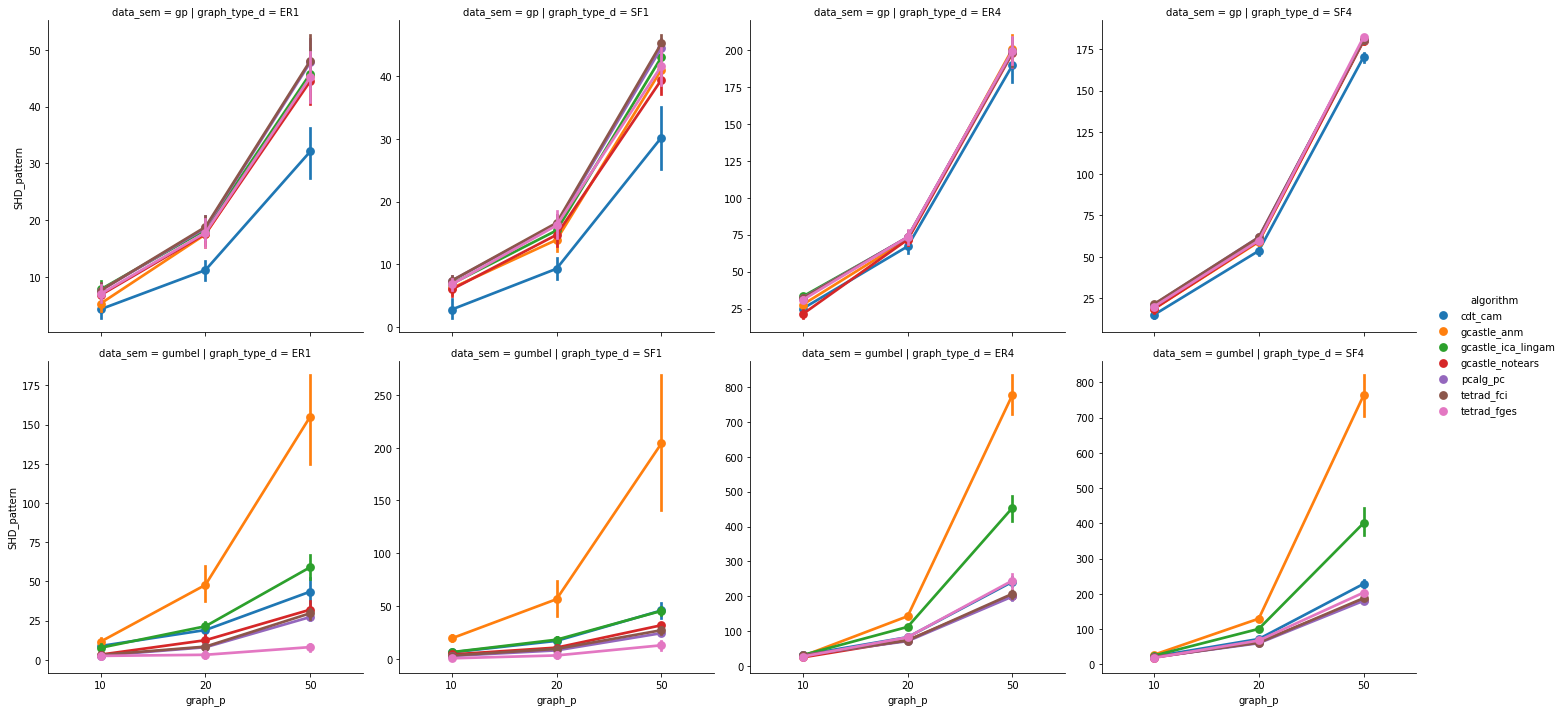

In [34]:
df_selected = select_case(df, 200)
sns.catplot(data=df_selected, x='graph_p', y='SHD_pattern', hue='algorithm', col='graph_type_d', row='data_sem', errorbar='se', kind='point', sharey=False)

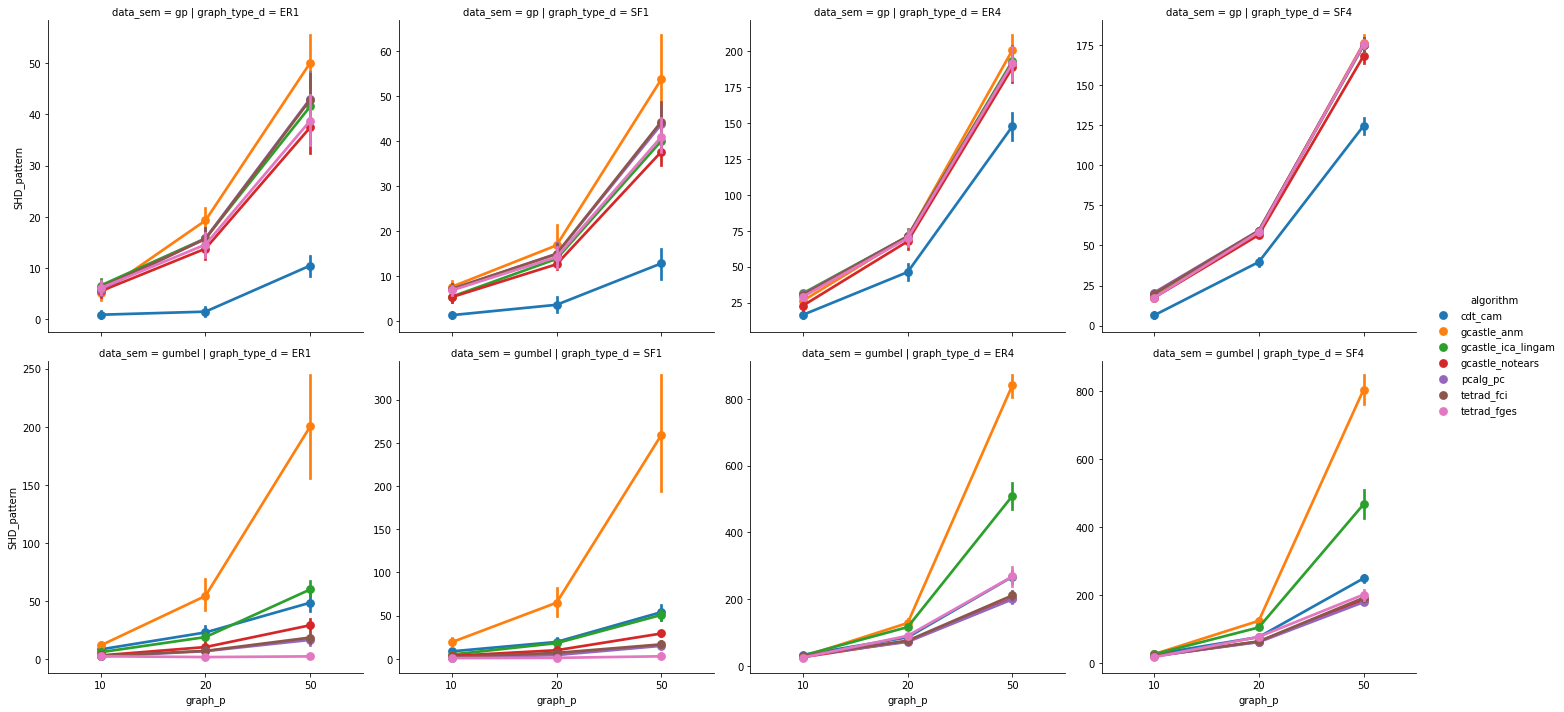

In [35]:
df_selected = select_case(df, 1000)
sns.catplot(data=df_selected, x='graph_p', y='SHD_pattern', hue='algorithm', col='graph_type_d', row='data_sem', errorbar='se', kind='point', sharey=False)